In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv(r'C:\Users\A7590\OneDrive\桌面\StockX-Data-Contest-2019-3.csv')
print(df.head())
print(df.shape)
r = {}
for c in df.columns:
    r[c] = df[c].isna().value_counts()
print(r)
df.shape

  Order Date   Brand                                   Sneaker Name  \
0     9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1     9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3     9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4     9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

  Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0     $1,097         $220      9/24/16       11.0    California  
1       $685         $220     11/23/16       11.0    California  
2       $690         $220     11/23/16       11.0    California  
3     $1,075         $220     11/23/16       11.5      Kentucky  
4       $828         $220      2/11/17       11.0  Rhode Island  
(99956, 8)
{'Order Date': False    99956
Name: Order Date, dtype: int64, 'Brand': False    99956
Name: Brand, dtype: int64, 'Sneaker Name': False    99956
Name: Sneaker Name, dt

(99956, 8)

In [3]:
# data cleaning
list1 = ['Sale Price','Retail Price']
for col in list1:
    df[col] = df[col].apply(lambda x:x.replace('$',''))
    df[col] = df[col].apply(lambda x:x.replace(',',''))
    df[col] = df[col].apply(lambda _:int(_))

In [4]:
list2 = ['Order Date', 'Release Date']
for date in list2:
    df[date] = df[date].apply(lambda _: pd.to_datetime(_,format = '%m/%d/%y'))
df['Release Month'] = df['Release Date'].dt.month
df.head()


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Release Month
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,9
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,11
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,11
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,11
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,2


In [5]:
def get_color(sneak_name):
    color_map = ['Beluga','Black','White','Zebra','Moonrock','Oxford-Tan','Turtledove','Yellow','Blue',
                'Orange','Butter','Rose','Hallows','Sesame','Static',
                'Desert','Silver','Chicago','Pink','Gray','Red','Abloh','Reaper','Menta','Volt']
    split = sneak_name.split('-')
    for i in range(len(split)-1):
        if split[i] == 'Off':
            if split[i+1] == 'White':
               split.remove(split[i+1])
    for n in split:
        if n in color_map:
            if n == 'Beluga':
                n = 'Gray'
                return n
            elif n =='Moonrock':
                n= 'Gray'
                return n
            elif n == 'Oxford-Tan':
                n= 'Gray'
                return n
            elif n == 'Turtledove':
                n= 'Gray'
                return n
            elif n == 'Butter':
                n= 'Yellow'
                return n
            elif n == 'Rose':
                n= 'Red'
                return n
            elif n== 'Hallows':
                n= 'Yellow'
                return n
            elif n == 'Chicago':
                n= 'Red'
                return n
            elif n == 'All-Hallows-Eve':
                n= 'Yellow'
                return n
            elif n =='Sesame':
                n= 'Gray'
                return n
            elif n =='Static':
                n= 'Silver'
                return n
            elif n =='Abloh':
                n= 'White'
                return n
            elif n == 'Reaper':
                n= 'Black'
                return n
            elif n == 'Menta':
                n= 'Gray'
                return n
            elif n == 'Volt':
                n= 'Green'
                return n
            else:
                return n
    return 'White'
df['color'] = df['Sneaker Name'].apply(get_color)

In [6]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     99956 non-null  datetime64[ns]
 1   Brand          99956 non-null  object        
 2   Sneaker Name   99956 non-null  object        
 3   Sale Price     99956 non-null  int64         
 4   Retail Price   99956 non-null  int64         
 5   Release Date   99956 non-null  datetime64[ns]
 6   Shoe Size      99956 non-null  float64       
 7   Buyer Region   99956 non-null  object        
 8   Release Month  99956 non-null  int64         
 9   color          99956 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 7.6+ MB


In [7]:
print(df.describe())
df.shape

         Sale Price  Retail Price     Shoe Size  Release Month
count  99956.000000   99956.00000  99956.000000   99956.000000
mean     446.634719     208.61359      9.344181       8.052243
std      255.982969      25.20001      2.329588       3.612667
min      186.000000     130.00000      3.500000       2.000000
25%      275.000000     220.00000      8.000000       6.000000
50%      370.000000     220.00000      9.500000       9.000000
75%      540.000000     220.00000     11.000000      11.000000
max     4050.000000     250.00000     17.000000      12.000000


(99956, 10)

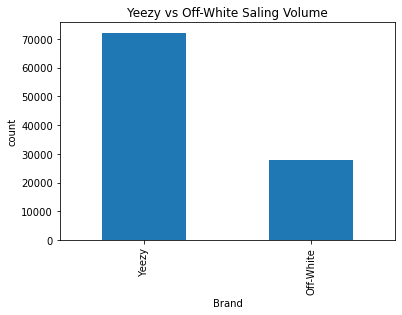

In [8]:
import matplotlib.pyplot as plt
pd.value_counts(df['Brand']).plot.bar()
plt.ylabel('count')
plt.xlabel('Brand')
plt.title('Yeezy vs Off-White Saling Volume')
plt.show()

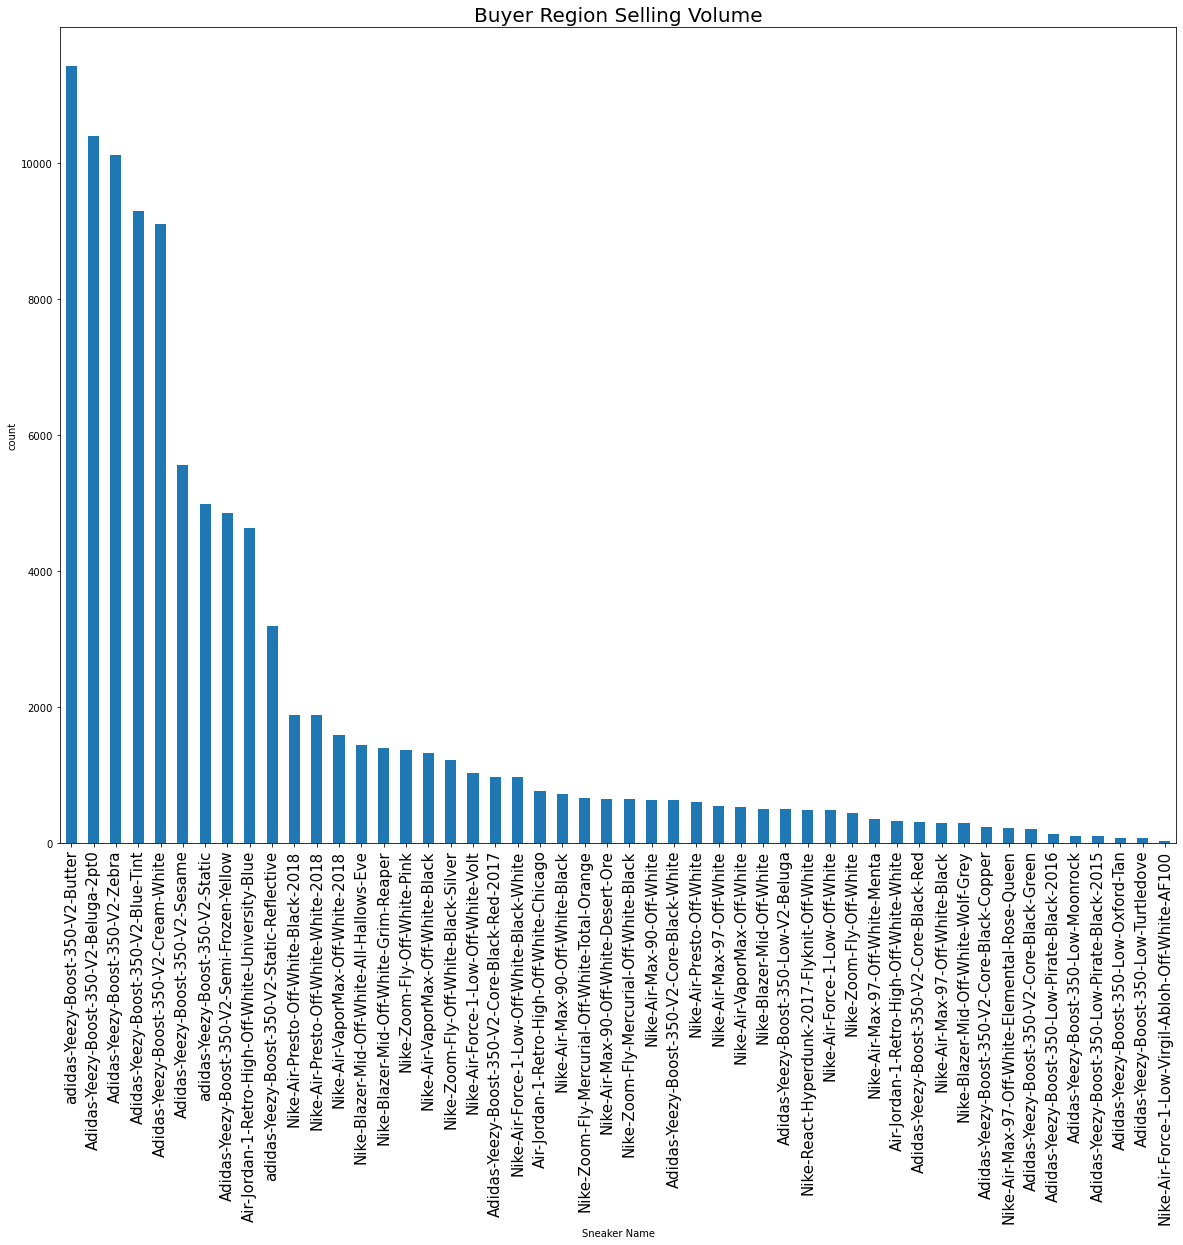

In [9]:
plt.figure(figsize = [20,15])
pd.value_counts(df['Sneaker Name']).plot.bar()
plt.ylabel('count')
plt.xlabel('Sneaker Name')
plt.title('Buyer Region Selling Volume',fontsize =20)
plt.xticks(rotation=90,fontsize= 15 )
plt.show()

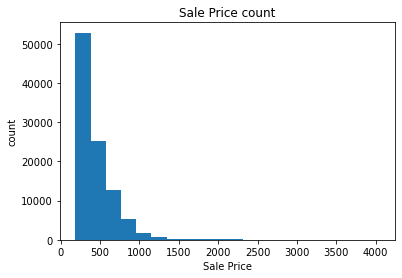

In [10]:
df['Sale Price'].plot.hist(bins = 20)  
plt.xlabel('Sale Price')
plt.ylabel('count')
plt.title('Sale Price count')
plt.show()

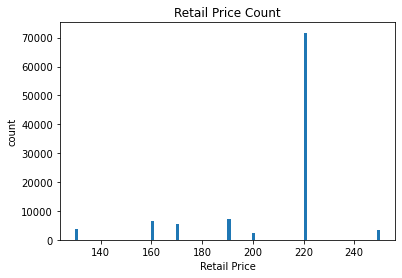

In [11]:
df['Retail Price'].plot.hist(bins = 100)  
plt.xlabel('Retail Price')
plt.ylabel('count')
plt.title('Retail Price Count')
plt.show()

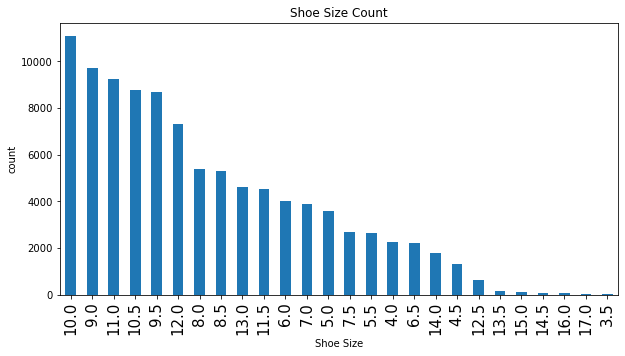

In [12]:
plt.figure(figsize = [10,5])
pd.value_counts(df['Shoe Size']).plot.bar()
plt.ylabel('count')
plt.xlabel('Shoe Size')
plt.xticks(rotation=90,fontsize= 15 )
plt.title('Shoe Size Count')
plt.show()

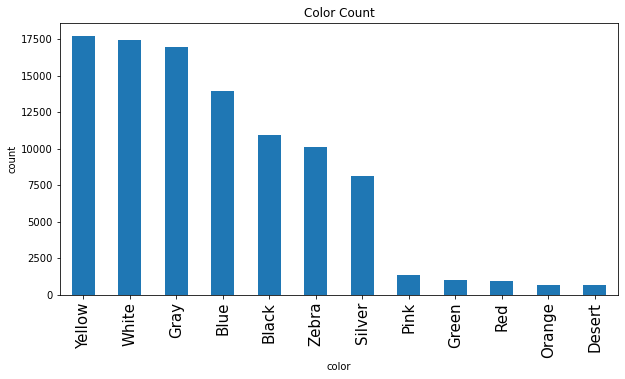

In [13]:
plt.figure(figsize = [10,5])
pd.value_counts(df['color']).plot.bar()
plt.ylabel('count')
plt.xlabel('color')
plt.xticks(rotation=90,fontsize= 15 )
plt.title('Color Count')
plt.show()

Text(0.5, 1.0, 'Amount vs Buyer Region')

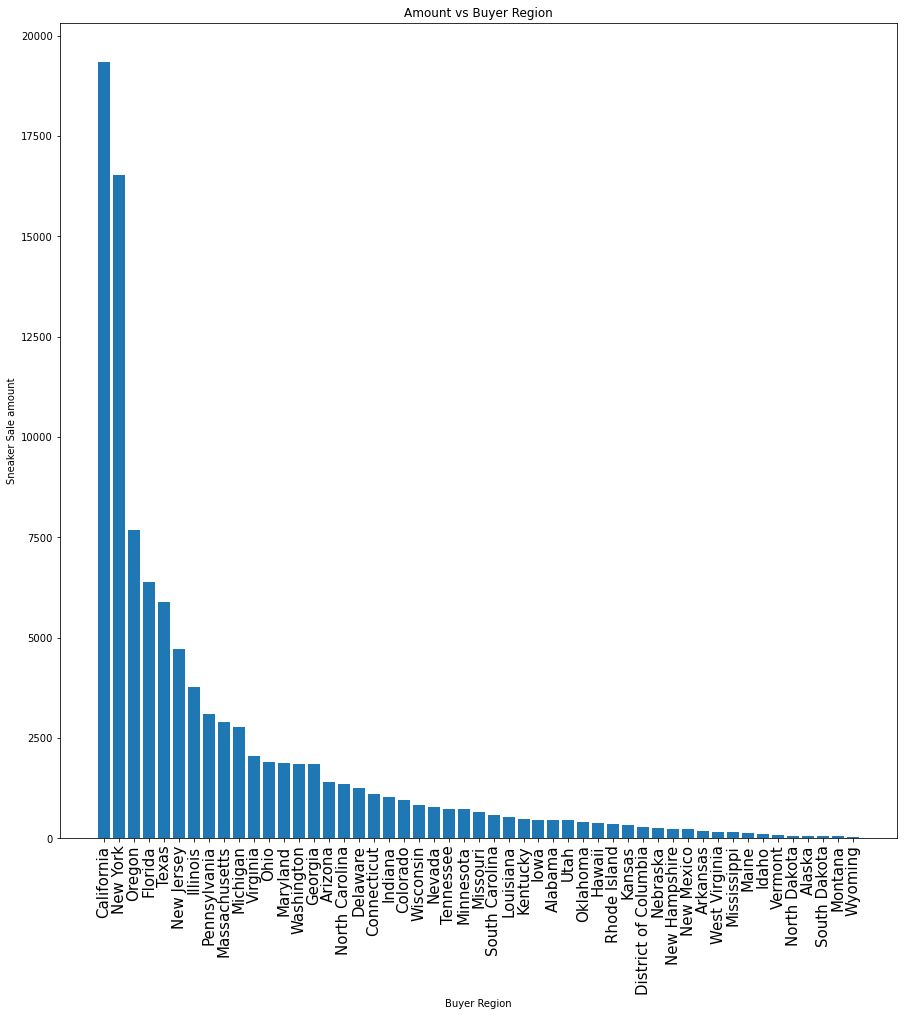

In [14]:
# Sale Price vs Buyer_region
categories = df['Buyer Region'].value_counts()
plt.figure(figsize=(15,15))
plt.bar(x = categories.index,height = categories)
plt.xticks(rotation = 90,fontsize=15)
plt.xlabel('Buyer Region')
plt.ylabel('Sneaker Sale amount')
plt.title('Amount vs Buyer Region')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

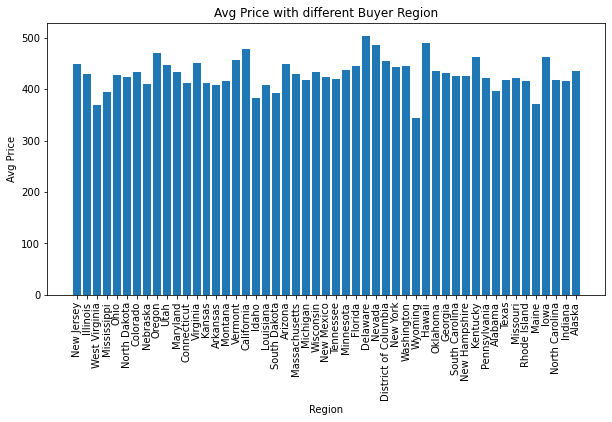

In [15]:
# Avg Sale Price vs Buyer Region
unique_region = set(df['Buyer Region'].values)
d = {}
for r in unique_region:
    d[r] = df[df['Buyer Region']==r][['Sale Price']].apply(np.average)
d1 = pd.DataFrame(d).T
plt.figure(figsize = [10,5])
plt.bar(d1.index,d1['Sale Price'].values)
plt.xlabel('Region')
plt.ylabel('Avg Price')
plt.title('Avg Price with different Buyer Region')
plt.xticks(rotation = 90,fontsize = 10)

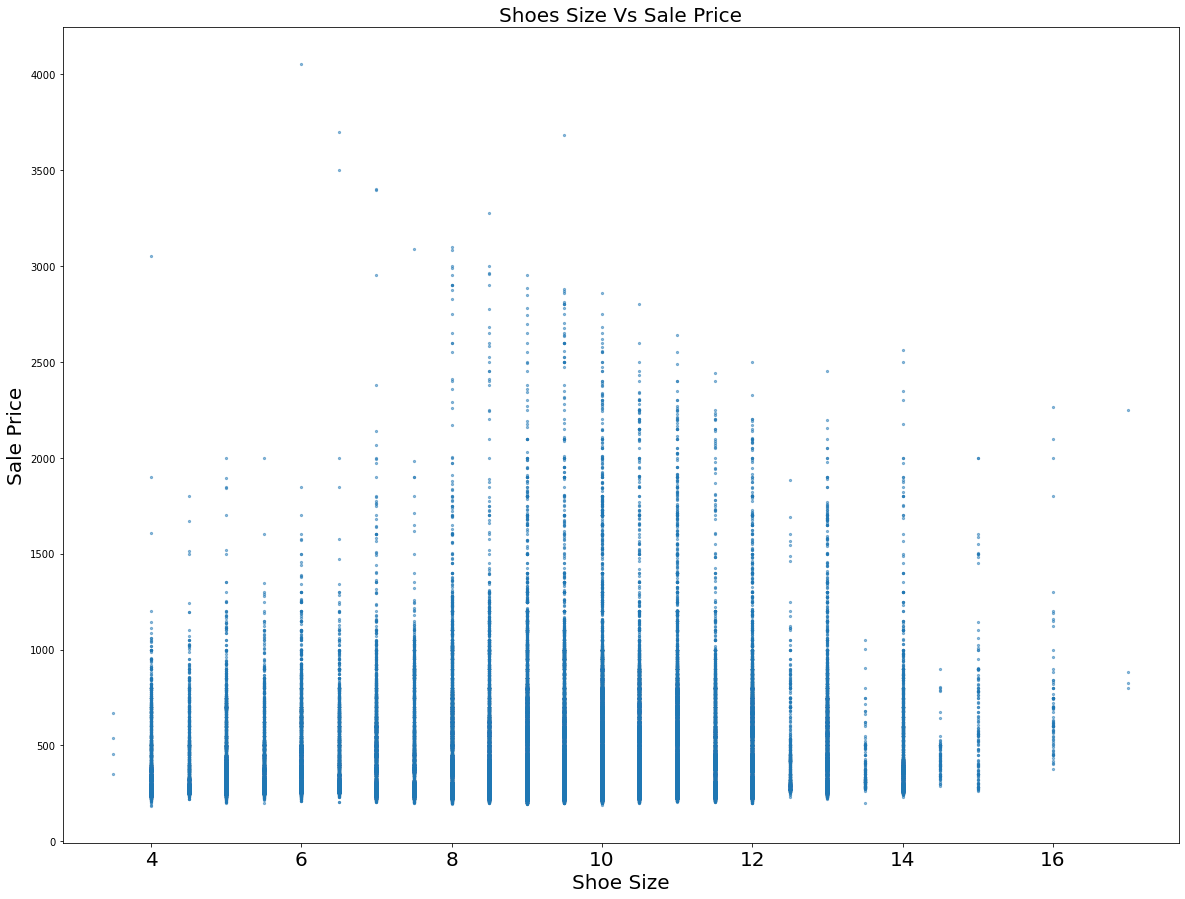

In [16]:
plt.figure(figsize=[20,15])
plt.scatter(df['Shoe Size'], df['Sale Price'],s=5,alpha = 0.5)
plt.xlabel('Shoe Size',fontsize = 20)
plt.ylabel('Sale Price',fontsize = 20)
plt.title('Shoes Size Vs Sale Price',fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

Text(0, 0.5, 'Sale Price')

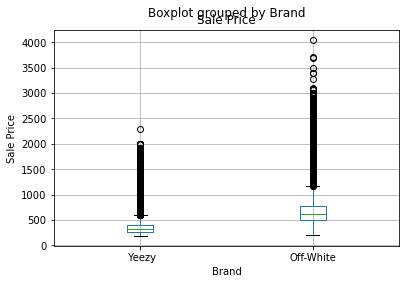

In [17]:
df[['Brand','Sale Price']].boxplot(by = 'Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

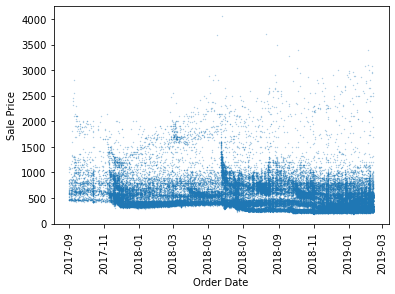

In [29]:
plt.scatter(df['Order Date'],df['Sale Price'],s = 0.1,alpha = 0.5)
plt.xlabel('Order Date')
plt.xticks(rotation = 90)
plt.ylabel('Sale Price')

Text(0.5, 1.0, 'Order Month vs Sale Price')

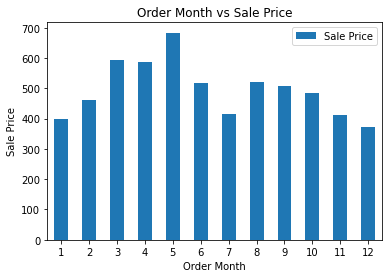

In [19]:
df['Order month'] = df['Order Date'].dt.month
df[['Order month','Sale Price']].groupby('Order month').mean().plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('Order Month')
plt.ylabel('Sale Price')
plt.title('Order Month vs Sale Price')

Text(0.5, 1.0, 'Order amount per Month')

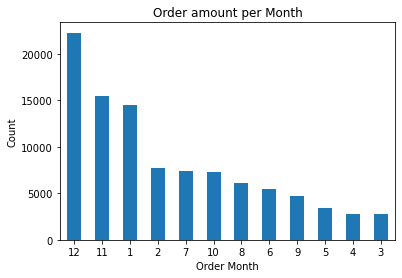

In [20]:
df['Order month'].value_counts().plot.bar()
plt.xticks(rotation = 0 )
plt.xlabel('Order Month')
plt.ylabel('Count')
plt.title('Order amount per Month')

<AxesSubplot:xlabel='color'>

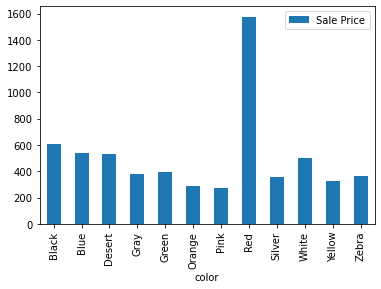

In [21]:
df[['color','Sale Price']].groupby('color').mean().plot.bar()

In [22]:
#Data Preprocessing
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     99956 non-null  datetime64[ns]
 1   Brand          99956 non-null  object        
 2   Sneaker Name   99956 non-null  object        
 3   Sale Price     99956 non-null  int64         
 4   Retail Price   99956 non-null  int64         
 5   Release Date   99956 non-null  datetime64[ns]
 6   Shoe Size      99956 non-null  float64       
 7   Buyer Region   99956 non-null  object        
 8   Release Month  99956 non-null  int64         
 9   color          99956 non-null  object        
 10  Order month    99956 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 8.4+ MB


In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Sale Price',axis = 1 )
X = X.drop('Order Date',axis = 1 )
X = X.drop('Release Date',axis = 1)
y = df['Sale Price']
stratified_col = df['Brand']

In [52]:
X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,shuffle = True, stratify = stratified_col,random_state = 42)
stratified_col_other = X_other['Brand']
X_val,X_test,y_val,y_test = train_test_split(X_other,y_other,train_size = 0.5, shuffle =True, stratify=stratified_col_other, random_state=42)
X_train
print(X_train['Brand'].value_counts(normalize = True))
print(X_val['Brand'].value_counts(normalize = True))
print(X_test['Brand'].value_counts(normalize = True))
X_train

 Yeezy       0.721942
Off-White    0.278058
Name: Brand, dtype: float64
 Yeezy       0.721925
Off-White    0.278075
Name: Brand, dtype: float64
 Yeezy       0.721939
Off-White    0.278061
Name: Brand, dtype: float64


,Brand,Sneaker Name,Retail Price,Shoe Size,Buyer Region,Release Month,color,Order month
86484,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,9.0,Texas,12,Silver,1
83343,Yeezy,adidas-Yeezy-Boost-350-V2-Static,220,10.5,Texas,12,Silver,12
7698,Off-White,Nike-Zoom-Fly-Off-White,170,10.5,Missouri,11,White,12
10673,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,220,9.0,California,11,Gray,12
38650,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220,12.0,Texas,6,Yellow,7
...,...,...,...,...,...,...,...,...
72338,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,220,7.5,Texas,11,Gray,12
85473,Yeezy,adidas-Yeezy-Boost-350-V2-Static,220,11.5,South Carolina,12,Silver,1
97836,Off-White,Nike-Air-Max-90-Off-White-Black,160,9.5,California,2,Black,2
35597,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,190,11.0,New Hampshire,6,Blue,7


In [78]:
# Converting categorical data to numerical
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

object_cols = ['Sneaker Name', 'Buyer Region', 'Brand','color']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index
OH_cols_test.index = X_test.index

# Adding the column names after one hot encoding
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

SS = StandardScaler()
object_col2 = ['Retail Price']
num_cols_train = pd.DataFrame(SS.fit_transform(X_train[object_col2]))
num_cols_val = pd.DataFrame(SS.transform(X_val[object_col2]))
num_cols_test = pd.DataFrame(SS.transform(X_test[object_col2]))

num_cols_train.index = X_train.index
num_cols_val.index =X_val.index
num_cols_test.index =X_test.index

num_cols_train.columns = object_col2
num_cols_val.columns = object_col2
num_cols_test.columns = object_col2

OH_X_train2 = OH_X_train.drop(object_col2,axis=1)
OH_X_val2 = OH_X_valid.drop(object_col2,axis=1)
OH_X_test2 = OH_X_test.drop(object_col2,axis=1)

OH_X_train3 = pd.concat([num_cols_train, OH_X_train2], axis=1)
OH_X_valid3 = pd.concat([num_cols_val, OH_X_val2], axis=1)
OH_X_test3 = pd.concat([num_cols_test, OH_X_test2], axis=1)


MM = MinMaxScaler()
object_col3 = ['Order month','Release Month','Shoe Size']
MM_num_cols_train = pd.DataFrame(MM.fit_transform(X_train[object_col3]))
MM_num_cols_val = pd.DataFrame(MM.transform(X_val[object_col3]))
MM_num_cols_test = pd.DataFrame(MM.transform(X_test[object_col3]))

MM_num_cols_train.index = X_train.index
MM_num_cols_val.index =X_val.index
MM_num_cols_test.index =X_test.index

MM_num_cols_train.columns = object_col3
MM_num_cols_val.columns = object_col3
MM_num_cols_test.columns = object_col3

OH_X_train3 = OH_X_train3.drop(object_col3,axis=1)
OH_X_val3 = OH_X_valid3.drop(object_col3,axis=1)
OH_X_test3 = OH_X_test3.drop(object_col3,axis=1)

OH_X_train4 = pd.concat([MM_num_cols_train, OH_X_train3], axis=1)
OH_X_valid4 = pd.concat([MM_num_cols_val, OH_X_val3], axis=1)
OH_X_test4 = pd.concat([MM_num_cols_test, OH_X_test3], axis=1)



In [80]:
OH_X_test4

,Order month,Release Month,Shoe Size,Retail Price,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga,...,color_Desert,color_Gray,color_Green,color_Orange,color_Pink,color_Red,color_Silver,color_White,color_Yellow,color_Zebra
21030,0.181818,0.9,0.592593,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93707,0.000000,0.8,0.444444,-0.741587,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75444,1.000000,0.9,0.444444,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40639,0.545455,0.5,0.259259,-1.934889,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63331,0.909091,0.9,0.444444,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58528,0.909091,0.2,0.703704,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78834,1.000000,0.9,0.555556,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33624,0.454545,0.4,0.592593,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94322,0.000000,1.0,0.407407,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
OH_X_train4.shape

(59973, 119)